(tema:1)=
# Tema 1: Gradientmetoden

I dette tema-projekt skal vi undersøge gradientmetoden (også kaldet gradientnedstigningsalgoritmen), som er en metode eller algoritme til bestemmelse af ekstremum (maksimum eller minimum) for en funktion af flere variable. Metoden bruges i mange ingeniør-sammenhænge i forbindelse med optimering, fx under træning af kunstig intelligens i machine learning. På engelsk hedder metoden gradient decent method eller steepest decent method.

I mange ingeniørproblemer har man brug for at enten minimere eller maksimere en given skalar-funktion $f : \mathbb{R}^n \to \mathbb{R}$ af $n$ variable. Minimumsværdien (såfremt den eksisterer) kan skrives som $\min \{f(\pmb{x}) | \pmb{x} \in \mathbb{R}^n \}$ dvs den mindste værdi i billedmængden/værdimængden $\min \mathrm{im}(f)$. Lad os kalde minimumsværdien for $A \in \mathbb{R}$. Man er ofte ikke interesseret i selve funktionsværdien (altså minimumsværdien) men derimod i den vektor $\pmb{x}^\dagger$ *hvor* funktionen antager sin minimumsværdi: $f(\pmb{x}^{\dagger}) = A$. Dette er også tilfældet i denne temaøvelse.

Ved træning af neurale netværk har man ofte brug for at finde minimum for funktioner af **mange** variable, for fx ChatGPt+ regner man med 10 milliarder variable. Vi vil nøjes med at kigge på funktioner af to variable, da mange af problemerne ved at finde minima allerede optræder her.

> Tip:
> Du bør starte tema-øvelsen med at downloade opgaven som en "Jupyter Notebook" `.ipynb`-fil. Du gør dette ved at klikke på pilen ![Arrow](./download_pil.png) ovenfor. Du kan herefter åbne tema-øvelsen direkte i VS Code.

## Minimum eller maximum?

### Spørgsmål a
Antag at vi har en algoritme eller metode der kan finde minimum af en funktion dvs $\pmb{x}^\dagger$ så $f(\pmb{x}^{\dagger}) = A$. Vi bliver nu bedt om at finde *maksimumværdien* for en funktion $g : \mathbb{R}^n \to \mathbb{R}$ altså $g(\pmb{x}^{\dagger}) = B$, hvor $B:=\max \mathrm{im}(g)$. Hvordan vil du gribe opgaven an? 

*Hint: Hvordan kan man ændre på $g$-funktionen så en maksimumsværdi bliver til en minimumsværdi*

Med dette på plads kan vi nøjes med at betragte optimeringsproblemet hvor vi skal finde *minimums*-værdier. Generelt kan funktioner have flere minimumspunkter, men vi vil kun kigge på funktioner der har præcist *et punkt* $\pmb{x}^{\dagger}$ så $f(\pmb{x}^{\dagger}) = A$, hvor $A$ er minimumsværdien af billedmængden.

## Test-funktionerne

In [1]:
# vi importerer de sædvanlige biblioteker og sætter printeindstillingerne
from dtumathtools import *
from sympy import *
init_printing()

In [2]:
%matplotlib inline 
# or use qt or notebook

Vi betragter følgende tre funktioner af formen $f_i: \mathbb{R}^2 \to \mathbb{R}$:

\begin{align*}
f_1(x_1,x_2) &= a x_{1}^{2} + x_{2}^{2} \\
f_2(x_1,x_2) &= q(x_1,x_2) \\
f_3(x_1,x_2)  &= (1-x_{1})^{2}+100(x_{2}-x_{1}^{2})^{2}
\end{align*}
hvor $a$ og $\lambda_1$ er *positive* reelle tal og den kvadratiske form $q$ er defineret i Python-koden nedenfor. Funktionen $f_1$ er også en (meget simpel) kvadratisk form, mens funktionen $f_3$ er et *fjerdegrads* polynomium. Alle funktionerne har et minimum (men ikke noget maksimum da de vokser mod uendeligt).

In [3]:
# Variable og parameter der ingår i funktionerne
x1, x2 = symbols('x1 x2', real=True)
a, lambda1 = symbols('a lambda1',  positive=True)

In [4]:
def f1(x1, x2, a = 0.5):
    return a * x1**2 + 1 * x2**2

def f2(x1, x2, lambda1 = 0.5):
    Q = 1/sqrt(2) * Matrix([[1,1],[1,-1]])
    A = Q.T * Matrix([[lambda1,0],[0,1]]) * Q
    b = Matrix([-2,4])
    x = Matrix([x1,x2])
    q = x.T * A * x + x.T * b
    return q[0] 

def f3(x1, x2):
    return (1 - x1)**2 + 100*(x2 - x1**2)**2

Funktionerne $f_1$ og $f_2$ afhænger af hhv. parametrene $a$ og $\lambda_1$. Standardværdierne (default-værdier) af parametrerne står i hver `def`-linje ovenfor. Vi kan kalde funktioner som følger:

In [5]:
f1(x1,x2), f1(x1,x2,2), f1(x1,x2,a)

Og på lignende vis kan vi se at $f_3$-funktionen faktisk er et fjerdegrads polynomum i $x_1$ og $x_2$:

In [6]:
f3(x1,x2).expand()

### Spørgsmål b

Forklar hvorfor følgende kommandoer giver samme output:

In [7]:
f1(1, 2), f1(1, 2, 0.5)

## Visualisering

Funktionerne kan plottes på følgende vis:

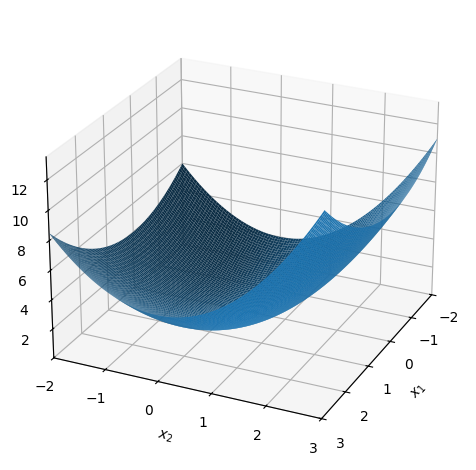

In [8]:
dtuplot.plot3d(f1(x1,x2,0.5), (x1,-2,3), (x2,-2,3), camera = {"elev": 25, "azim": 25})

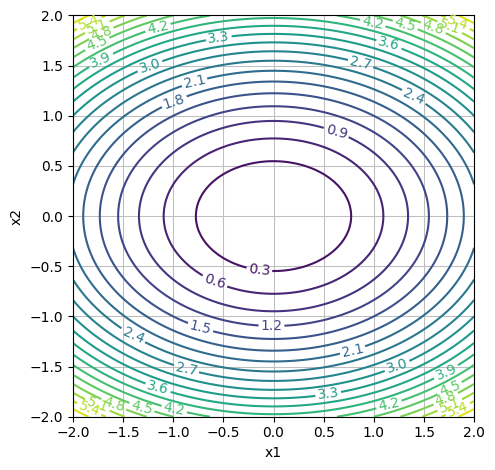

In [9]:
# "levels": 20 is the number of contour lines
dtuplot.plot_contour(f1(x1,x2,0.5), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": 20}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

Det er nyttigt at kunne bestemme præcist hvilke niveaukurver der plotter. Her plottes:

In [10]:
[0.1, 0.5, *range(1,10,1)]

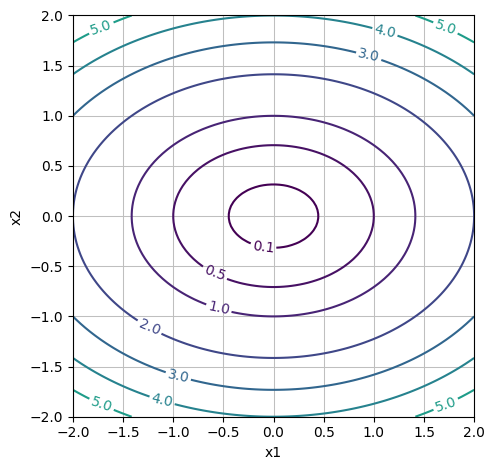

In [11]:
# "levels": [0.1, 0.5, *range(1,10,1)] is the values of the contour lines
dtuplot.plot_contour(f1(x1,x2,0.5), (x1,-2,2), (x2,-2,2), rendering_kw = {"levels": [0.1, 0.5, *range(1,10,1)]}, xlabel = "x1", ylabel = "x2", is_filled=False, aspect=(1.,1.))

### Spørgsmål c

Plot de tre funktioner for forskellige værdier af parametrene $a$ og $\lambda_1$. Husk at de skal være *positive* tal. Du skal som minimum plotte de tre funktioner med standardværdierne af $a$ og $\lambda_1$, men du bør også prøve at se hvad der sker med niveaukurvernes form, når $a$ og $\lambda_1$ fx bliver små (eller store) størrelser som $0.01$. Dine plots bør illustrere hvor funktionerne har minimum, og du skal derfor ændre både intervallerne for $x_1$ og $x_2$ og ændre hvilke niveaukurver der plottes.

### Spørgsmål d

Funktionen $f_3$ kaldes banen-funktionen. Kan du finde en niveau-kurve der ligner en banan? Angiv en funktionsværdi for $f_3$ der giver noget der ligner en banan-niveaukurve. Det bør være en sammenhængende (forbundet) kurve - og ikke to kurver.

### Spørgsmål e

For en af de tre funktioner er det let at gætte/aflæse minimum. Hvilken og hvor er minimum $\pmb{x}^\dagger$?

## Gradientvektoren

### Spørgsmål f

Udregn gradientvektoren for alle funktionerne. Som kontrol kan benyttes SymPy, hvor vi for at udregne $\nabla f_1$ kalder:

In [12]:
nf1 = dtutools.gradient(f1(x1,x2,a),(x1,x2))
nf1

⎡2⋅a⋅x₁⎤
⎢      ⎥
⎣ 2⋅x₂ ⎦

Vi sætter nu $a = 0.5$ indtil andet nævnes.

### Spørgsmål g

Plot for $a=0.5$ gradientvektoren af $f_1$ som et vektorfelt $\mathbb{R}^2 \to \mathbb{R}^2$ sammen med niveaukurverne for $f_1$. 

*Hint: Se Python demo for uge 1.*

### Spørgsmål h

Gradientvektoren udspænder den retning hvor "funktionen aftager og vokser mest". Peger gradientvektoren i den retning hvor funktionen aftager eller vokser?

### Spørgsmål i

Find en parametrisering $\pmb{r}(t)$ af niveaukuverne af $\{(x_1, x_2) \in \mathbb{R}^2 | f_1(x_1,x_2) =c \}$ for *hver* værdi af $c \in ]0,\infty[$. Husk at $a=1/2$. 

*Hint*: 1) Niveaukurverne er ellipser, hvis semi-akser afhænger af $\sqrt{c}$. 2) Vektorfunktioen $\pmb{r}(t) = (1 \cos(t), 2 \sin(t))$ for $t \in [0, 2 \pi]$ parametriserer ellipser med centrum i $(0,0)$ og med semi-akser $1$ og $2$.

### Spørgsmål j

Lad $\pmb{x}_0 = (1,2)$. Udregn $f_1(\pmb{x}_0)$ og angiv parameterfremstillingen $\pmb{r}(t)$ for niveaukurven gennem $\pmb{x}_0$. Bestem den $t_0$-værdi så  $\pmb{r}(t_0) = (1,2)$. Find tangentvektoren $\pmb{r}'(t_0)$ i punktet $\pmb{x}_0$. Udregn gradientvektoren i punktet og vis at $\pmb{r}'(t_0)$ og $\nabla f_1(1,2)$ er ortogonale.

*Hint*: $t_0$ opfylder ligningen $\cos(t_0) = 1/3$. (Hvis du ikke kan komme igennem opgaven, så gå videre med de næste opgaver og vend til opgaven senere. Resultatet fra denne opgave bruges ikke i det følgende.)

## Trinvis gradientretning for $f_1$

Vi opfatter punktet $\pmb{x}_0 = (1,2)$ som vores startgæt. Vi vil nu prøve at bruge information om gradientvektoren $\nabla f_1$ til iterativt at finde frem til minimumspunktet for $f_1$. I hvert trin vil vi flytte os i gradientvektorens retning. Da vi ønsker at gøre værdien af $f_1(1,2)$ mindre, må vi skulle bevæge os i retning af $-\nabla f_1(\pmb{x}_0)$, altså den negative gradient-retning. Vi definerer først gradientvektoren som en Python-funktion:

In [13]:
def nf1(x1, x2, a = 0.5):
    return Matrix([2*a*x1, 2*x2])   # gradienten, udregnet tidligere

In [14]:
x_0 = Matrix([1,2])
nf1(*x_0)     # * betyder bare at x_0-vektoren splittes op i to argumenter

⎡1.0⎤
⎢   ⎥
⎣ 4 ⎦

Vi skal beslutte os for hvor langt vi tør gå i gradientvektorens retning. Vi prøver først at gå $25\%$ af gradientvektorens længde. Dette kaldes *skridtlængden* da vi forestiller os at vi tager et skridt i gradientvektorens negative retning:

In [15]:
x_1 = x_0 - 0.25 * nf1(*x_0)
x_1

⎡0.75⎤
⎢    ⎥
⎣1.0 ⎦

Vi gentager proceduren nogle flere gange.

In [16]:
x_2 = x_1 - 0.25 * nf1(*x_1)
x_3 = x_2 - 0.25 * nf1(*x_2)
x_0, x_1, x_2, x_3

⎛⎡1⎤  ⎡0.75⎤  ⎡0.5625⎤  ⎡0.421875⎤⎞
⎜⎢ ⎥, ⎢    ⎥, ⎢      ⎥, ⎢        ⎥⎟
⎝⎣2⎦  ⎣1.0 ⎦  ⎣ 0.5  ⎦  ⎣  0.25  ⎦⎠

### Spørgsmål k

Gentag proceduren mindst 10 gange. Kommer vi frem til minimumspunktet $\pmb{x}^{\dagger}$? Hvad er gradientvektoren i minimumspunktet? Prøv at gøre skridtlængde 0.25 større og mindre. Skridtlængden $\alpha = 0.5$ er speciel for vores startgæt. Hvad sker der?

Vi kan samle ovenstående til følgende iterative metode:
\begin{equation*} 
  \pmb{x}_{\text{næste}} = \pmb{x}_{\text{nuværende}} - \alpha \nabla f(\pmb{x}_{\text{nuværende}})
\end{equation*}
hvor $\alpha > 0$ angiver skridtlængden og $f$ er den funktion vil ønsker at minimere. I maskinlæring og kunstig intelligens kaldes $\alpha$ for læringsraten. 

Vi kan selvfølgelig også skrive ovenstående metode som:
\begin{equation*} 
  \pmb{x}_{n+1} = \pmb{x}_{n} - \alpha \nabla f(\pmb{x}_{n})
\end{equation*}
hvor $n = 0,1,2, \dots$ og $\pmb{x}_{0}$ angiver vores startgæt.

###  Spørgsmål l

Hvad er afstanden mellem $\pmb{x}_{n}$ og $\pmb{x}_{n+1}$? Dit svar skal være en formel indeholdende $\alpha, \nabla f(\pmb{x}_{n})$ og normen i $\mathbb{R}^2$.

### Spørgsmål m

Færdiggør følgende kode så outputtet bliver $\pmb{x}_{100}$ med startgæt $\pmb{x}_{0}=(1,2)$ og læringsrate $\alpha = 0.1$:

In [17]:
alpha = 0.25
x = Matrix([1,2])
for n in range(100):
    x = # one line of code missing
x

SyntaxError: invalid syntax (3198201554.py, line 4)

## Gradientmetoden: Implementering og videre undersøgelser

Vi vil nu gerne implementere en generel gradientmetode der virker for alle funktioner (hvor vi kan udregne deres gradient) og som automatisk skal stoppe når gradientvektoren bliver lille eller et maks antal iterationer bliver nået. 

Gradientmetoden beskrevet som algoritme:
1. Initialiseringparametre ($\pmb{x}_0$, $\alpha$, tolerance, max iterationer $n_\text{max}$).
1. Opdateringstrin: $\pmb{x}_{n+1} \leftarrow \pmb{x}_{n} - \alpha \nabla f(\pmb{x}_{n})$ og $n \leftarrow n + 1$.
1. Afslutningskriterier: $||\nabla f(\pmb{x}_{\text{nuværende}})|| \le \text{tolerance}$ eller $n = n_\text{max}$.
1. Output: $\pmb{x}_n$ og $n$ for et $n \le n_\text{max}$ hvor afslutningskriteriet er mødt.

In [ ]:
def gradient_method (f, x_0, alpha = 0.01, tol = 0.0001, n_max = 5000):
    nf = dtutools.gradient(f, (x1,x2))
    x = x_0
    nfx = nf.subs({x1: x[0], x2: x[1]})     # gradientvektoren i x_0
    n = 0
    while nfx.norm() > tol and n < n_max:
        x =   # one line of code missing
        nfx = # one line of code missing
        n =   # one line of code missing
#        print(x)                           # uncomment to see the iterations
    return x, n

gradient_method(f1(x1,x2,0.5), Matrix([1,2]), 0.1)

### Spørgsmål n

Færdiggør koden ovenfor. Der mangler kun kode i tre linjer. Kode-blokken bør give output:  

$\displaystyle \left( \left[\begin{matrix}9.40461086986004 \cdot 10^{-5}\\5.92855496895059 \cdot 10^{-9}\end{matrix}\right], \  88\right)$

Hvad betyder dette output?

### Spørgsmål o

Fjern `#` foran `print(x)` og kør koden igen. Hvad ser du?

### Spørgsmål p

Foretag gradientmetoden for $f_1$ for $a = 0.5$ og $a = 0.01$ med følgende værdier `x_0 = Matrix([1,10])`, `alpha = 0.1`, `tol = 1e-4`, `nmax = 5000`. Hvorfor konvergerer algoritmen meget langsommere for $a = 0.01$? Med konvergens mener vi her blot af skridt i gradientmetoden før den stopper. (Det kan være nyttigt at sætte `#` foran `print(x)` igen i `gradient_method` men dette er valgfrit).

*Hint*: Hvilken retning peger gradientvektoren når $a$ bliver lille?

### Spørgsmål q

Vi har brugt forskellige `alpha`-værdier ovenfor, men hvilken bør man egentligt bruge? Det er ikke nemt at svare på og afhænger meget af anvendelsen (funktionen vi vil optimere!). Stil en **chatbot** (fx https://copilot.microsoft.com/) følgende spørgsmål: "Hvilken læringsrate ville du  bruge i gradientmetoden?". Hvis chatbottens svar er meget langt, og du ikke ønsker at læse så meget tekst, så bed den om at give et kortere svar. Omvendt, hvis der er detaljer i chatbottens svar du synes er uklare, så bed chatbotten om at forklare nærmere.

### Spørgsmål r

For funktionerne $f_1$ og $f_2$ kan man vælge en høj skridtlængde/læringsrate $\alpha$ (dog ikke over 1, prøv!), men man skal ofte vælge læringsraten $\alpha$ som $0.1$, $0.01$ eller endda $0.001$. 
Dette gælder fx for $f_3$-funktionen, hvor $\alpha$ skal vælges lille. Opgaven er at finde minimumspunktet $\pmb{x}^{\dagger}$ for funktionen. Kig tilbage på dine plots af funktionen for at komme med et godt startgæt.  


### Spørgsmål s (valgfrit)

Her er en lille konkurrence: Find minimum for følgende $f_4$-funktion. Du kan skrive det bedste bud på et minimumspunkt (sammen med funktionsværdien) ind i diskussionsforummet Ed.

In [ ]:
def f4(x1, x2):
    return (sqrt(3) - x1)**2 + sqrt(pi)*74*(x2 - x1**2)**2 + sqrt(pi)

### Spørgsmål t (valgfrit)

Skriv en Python-program der plotter den sti vi går af med gradientmetoden. Du skal altså plotte listen af punkter $\pmb{x}_0, \pmb{x}_1,\pmb{x}_2,\pmb{x}_3,\pmb{x}_4, \dots$ (forbundet med rette linjer). Stien bør plottes ovenpå et plot af niveaukurverne. Test dit program for $f_1, f_2$ og $f_3$.

### Spørgsmål u (valgfrit)

Under træning af neurale netværk benyttes ofte en variant af gradientmetoden som hedder den stokastiske gradient-metode (stochastic gradient descent method, forkortet SGD). Undersøg på egen hånd (lav en Google-søgning, spørg en chatbot, slå op i en bog, osv.) hvad metoden gør anderledes. Forklar forskellen med egne ord.